In [28]:
%matplotlib inline

In [29]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [30]:
import sys
sys.path.append('.')

import pandas as pd
import numpy as np
import incense
from incense import ExperimentLoader
import matplotlib.pyplot as plt
from src import settings

loader = ExperimentLoader(
    mongo_uri=settings.MONGO_DB_URL,
    db_name=settings.MONGO_DB_NAME
)

In [31]:
def find_similar(exp):
    """function to find based on hash.
    """
    hash_ = exp.to_dict()['config'][settings.EXP_HASH]
    return loader.find_by_config_key(settings.EXP_HASH, hash_)

def hash_based_bundle(exps):
    bundles = {}
    for exp in exps:
        hash_ = exp.to_dict()['config'][settings.EXP_HASH]
        if hash_ in bundles:
            bundles[hash_].append(exp)
        else:
            bundles[hash_] = [exp]
    return bundles

def get_bo_plots(exp):
    return {k: v for k,v in exp.artifacts.items() if k.startswith('bo-plot')}

# Show aggregate


In [17]:
# From one to all of same hash.

query = {"$and": [
            {"config.model.name": "GPModel"},
        ]}
exp = loader.find(query)[0]
exps = find_similar(exp)

In [18]:
# display name
# list of exp

def get_exp_key_col(exp):
    config = exp.to_dict()['config']
    return {
        'model': config['model']['name'],
        'model2': config.get('model2', {}).get('name', None),
        'acq': config.get('acquisition_function', {}).get('name'),
        'bo': bool(config.get('bo', None)),
        'f': config['obj_func']['name'],
        'config': config,
    }

exps = loader.find({'status': 'COMPLETED'})
bundles = hash_based_bundle(exps)
bundles = {k: dict(count=len(v), exps=v, **get_exp_key_col(v[0])) for k,v in bundles.items()}

df = pd.DataFrame.from_dict(bundles, orient='index')
df

count  \
063dfefe784a0babbea92e7f2747ac9322a61002      1   
10c65b48190b6e65ca86957e92eeacdf3035082e      1   
312255371f61c50a4d528b678e156692ab42ea2c      2   
397630bf6f746694daeeb93b9099cd6cb021e149      1   
48ccc35c3e7fff27c1f745de12c5b075e41f0033      1   
5b75255ff678d55d27090a41e64370b4d082c4dd      1   
6ce66b45c365a598090b33ec8d4051764c2ef21a      1   
7509b69f690b0ce48212710ae1148a0db0350817      1   
881e4d4b1bf3803d2da05eadad32289ee6c27d3d      1   
8d4d67d999c4e2e58f752881d0e9bca2efe03e8a      1   
8fff3abfeec3c20253fcefb262001918f96baad9      1   
bad0131b1f99d3b4ac8b76025aba7fcc384e2135      1   
be010807c618554e0c0299098ab031ebc0486802      1   
c1fd7d428bfa13960b4d709474bc5d5c76383969      1   
fd8723f211413604d22ed6fabf10d16a3da28f8d      1   

                                                                                       exps  \
063dfefe784a0babbea92e7f2747ac9322a61002                    [Experiment(id=15, name=lions)]   
10c65b48190b6e65ca86957e92eeacdf3035082e                    [Experiment(id=19, name=lions)]   
312255371f61c50a4d528b678e156692ab42ea2c  [Experiment(id=10, name=lions), Experiment(id=...   
397630bf6f746694daeeb93b9099cd6cb021e149                    [Experiment(id=18, name=lions)]   
48ccc35c3e7fff27c1f745de12c5b075e41f0033                    [Experiment(id=22, name=lions)]   
5b75255ff678d55d27090a41e64370b4d082c4dd                    [Experiment(id=12, name=lions)]   
6ce66b45c365a598090b33ec8d4051764c2ef21a                    [Experiment(id=11, name=lions)]   
7509b69f690b0ce48212710ae1148a0db0350817                    [Experiment(id=23, name=lions)]   
881e4d4b1bf3803d2da05eadad32289ee6c27d3d                    [Experiment(id=16, name=lions)]   
8d4d67d999c4e2e58f752881d0e9bca2efe03e8a                    [Experiment(id=17, name=lions)]   
8fff3abfeec3c20253fcefb262001918f96baad9                     [Experiment(id=9, name=lions)]   
bad0131b1f99d3b4ac8b76025aba7fcc384e2135                    [Experiment(id=21, name=lions)]   
be010807c618554e0c0299098ab031ebc0486802                    [Experiment(id=13, name=lions)]   
c1fd7d428bfa13960b4d709474bc5d5c76383969                    [Experiment(id=20, name=lions)]   
fd8723f211413604d22ed6fabf10d16a3da28f8d                    [Experiment(id=24, name=lions)]   

                                               model model2   acq     bo  \
063dfefe784a0babbea92e7f2747ac9322a61002  DKLGPModel   None  None  False   
10c65b48190b6e65ca86957e92eeacdf3035082e  DKLGPModel   None  None  False   
312255371f61c50a4d528b678e156692ab42ea2c     GPModel   None  None  False   
397630bf6f746694daeeb93b9099cd6cb021e149     GPModel   None  None  False   
48ccc35c3e7fff27c1f745de12c5b075e41f0033  DKLGPModel   None  None  False   
5b75255ff678d55d27090a41e64370b4d082c4dd     GPModel   None  None  False   
6ce66b45c365a598090b33ec8d4051764c2ef21a     GPModel   None  None  False   
7509b69f690b0ce48212710ae1148a0db0350817  DKLGPModel   None  None  False   
881e4d4b1bf3803d2da05eadad32289ee6c27d3d  DKLGPModel   None  None  False   
8d4d67d999c4e2e58f752881d0e9bca2efe03e8a  DKLGPModel   None  None  False   
8fff3abfeec3c20253fcefb262001918f96baad9  DKLGPModel   None  None  False   
bad0131b1f99d3b4ac8b76025aba7fcc384e2135  DKLGPModel   None  None  False   
be010807c618554e0c0299098ab031ebc0486802     GPModel   None  None  False   
c1fd7d428bfa13960b4d709474bc5d5c76383969  DKLGPModel   None  None  False   
fd8723f211413604d22ed6fabf10d16a3da28f8d  DKLGPModel   None  None  False   

                                                          f  \
063dfefe784a0babbea92e7f2747ac9322a61002          TwoKink1D   
10c65b48190b6e65ca86957e92eeacdf3035082e          TwoKink1D   
312255371f61c50a4d528b678e156692ab42ea2c          TwoKink1D   
397630bf6f746694daeeb93b9099cd6cb021e149          TwoKink1D   
48ccc35c3e7fff27c1f745de12c5b075e41f0033          TwoKink1D   
5b75255ff678d55d27090a41e64370b4d082c4dd  TwoKinkDEmbedding   
6ce66b45c365a598090b33ec8d4051764c2ef21a      

## Plot BO CI

In [19]:
#exps_row = df.loc[df.bo == True].iloc[0]
exps_row = df.loc["60519fa6dbfe5a80969a4b30ddd14cafbf68612f"] # Kink1D
# exps_row = df.loc["75d24ad445d397dbe1a8add031764c707d37cfdf"] # IncreasingOscillationDecreasingAmplitude
exps = exps_row.exps

def get_rmse(exp):
    """Uses old `mse` as fallback."""
    return exp.metrics.get('rmse', exp.metrics.get('mse',pd.Series([])))

def plot_bo_regret(exps, label=None):
    df_concat = pd.concat([get_rmse(exp) for exp in exps], axis=1)
    mean = df_concat.mean(axis=1)
    var = df_concat.var(axis=1)
    plt.plot(df_concat.index, mean, label=label)
    plt.fill_between(df_concat.index, mean - 2 * np.sqrt(var), mean + 2 * np.sqrt(var), alpha=0.2)

KeyError: '60519fa6dbfe5a80969a4b30ddd14cafbf68612f'

In [20]:
# Calculate mean and variance of MSE
# TODO: maybe not silence missing MSE...
plot_bo_regret(exps, label="Regret")
plt.legend()

NameError: name 'plot_bo_regret' is not defined

In [21]:
# Plot all last BO plot
# TODO: plot in grid
for i, exp in enumerate(exps):
    name, last_plot = sorted(get_bo_plots(exp).items())[-1]
    last_plot.show()
    plt.title("Experiment {}:".format(i))


IndexError: list index out of range

## Plot GP final MSE

In [22]:
exps_rows_df = df
#exps_rows_df = exps_rows_df.loc[exps_rows_df.bo == False]
#exps_rows_df = exps_rows_df[exps_rows_df.f == 'Kink1D']
exps_rows_df = exps_rows_df[exps_rows_df.f == 'Kink2D']
#exps_rows_df = exps_rows_df[exps_rows_df.f == 'IncreasingOscillationDecreasingAmplitude']
#exps_rows_df = exps_rows_df[exps_rows_df.model == 'DKLGPModel']
exps_rows_df = exps_rows_df.copy()
exps_rows_df

Empty DataFrame
Columns: [count, exps, model, model2, acq, bo, f, config]
Index: []

In [23]:
exps_rows_df.loc['60519fa6dbfe5a80969a4b30ddd14cafbf68612f'].exps.pop()
exps_rows_df.loc['60519fa6dbfe5a80969a4b30ddd14cafbf68612f'].exps.pop()

KeyError: '60519fa6dbfe5a80969a4b30ddd14cafbf68612f'

In [928]:
# Stats on result
exps_rows_df['rmse'] = exps_rows_df.apply(lambda row: np.array([e.result for e in row.exps], dtype=np.float), axis=1)
exps_rows_df['rmse_mean'] = exps_rows_df.apply(lambda row: np.nanmean(row.rmse), axis=1)
exps_rows_df['rmse_var'] = exps_rows_df.apply(lambda row: np.nanvar(row.rmse), axis=1)

# Create short hand name for convinience
def get_name(row):
    name = row.model
    if row.bo: 
        name = name + " BO"
    if row.acq is not None: 
        name = name + " " + row.acq
    name = name + " " + row.f
    return name

exps_rows_df['name'] = exps_rows_df.apply(get_name, axis=1)
exps_rows_df = exps_rows_df.set_index('name')

exps_rows_df

count  \
name                                             
GPModel BO CurvatureAcquisition Kink2D       2   
GPModel Kink2D                               5   
GPModel BO QuadratureAcquisition Kink2D      1   

                                                                                      exps  \
name                                                                                         
GPModel BO CurvatureAcquisition Kink2D   [Experiment(id=68, name=lions), Experiment(id=...   
GPModel Kink2D                           [Experiment(id=32, name=lions), Experiment(id=...   
GPModel BO QuadratureAcquisition Kink2D                    [Experiment(id=70, name=lions)]   

                                           model model2  \
name                                                      
GPModel BO CurvatureAcquisition Kink2D   GPModel   None   
GPModel Kink2D                           GPModel   None   
GPModel BO QuadratureAcquisition Kink2D  GPModel   None   

                                                           acq     bo       f  \
name                                                                            
GPModel BO CurvatureAcquisition Kink2D    CurvatureAcquisition   True  Kink2D   
GPModel Kink2D                                            None  False  Kink2D   
GPModel BO QuadratureAcquisition Kink2D  QuadratureAcquisition   True  Kink2D   

                                                                                    config  \
name                                                                                         
GPModel BO CurvatureAcquisition Kink2D   {'acquisition_function': {'name': 'CurvatureAc...   
GPModel Kink2D                           {'exp_hash': 'bcc45c47bfbf213bbd3fc2342f230019...   
GPModel BO QuadratureAcquisition Kink2D  {'acquisition_function': {'name': 'QuadratureA...   

                                                                                      rmse  \
name                                                                                         
GPModel BO CurvatureAcquisition Kink2D              [63.78118408433784, 75.85735525277758]   
GPModel Kink2D                           [54.57754611235148, 60.59713419639089, 75.9411...   
GPModel BO QuadratureAcquisition Kink2D                                [75.40778273763367]   

                                         rmse_mean   rmse_var  
name                                                           
GPModel BO CurvatureAcquisition Kink2D   69.819270  36.458478  
GPModel Kink2D                           60.080682  68.336693  
GPModel BO QuadratureAcquisition Kink2D  75.407783   0.000000

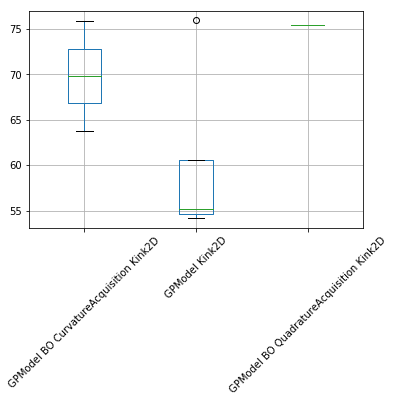

In [929]:
# Plot result (MSE) boxes!
exps_rows_df['rmse'].apply(lambda x: pd.Series(x)).T.boxplot(rot=45)

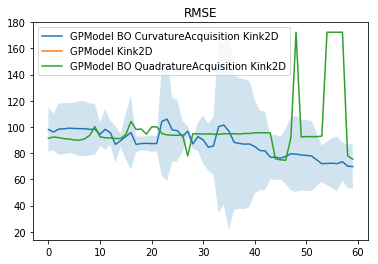

In [930]:
plt.title('RMSE')

for idx, row in exps_rows_df.iterrows():
    exps = row.exps
    plot_bo_regret(exps, label=row.name)

plt.legend()
plt.show()

# (Temporary) Dumbster for scripting...

In [852]:
import numpy as np

D = 2
N_new = 5
N = 10

A = np.ones((N,D,D))
B = np.ones((N, N_new))
C = np.tensordot(B, A, axes=(0,0))
C.shape

(5, 2, 2)

/Users/tmpethick/anaconda3/envs/lions/lib/python3.6/site-packages/pandas/core/generic.py:5096: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [684]:
# Dirty hack to filter out last experiment of curvature
exps_rows_df.exps.iloc['60519fa6dbfe5a80969a4b30ddd14cafbf68612f'] = exps_rows_df.exps.iloc['60519fa6dbfe5a80969a4b30ddd14cafbf68612f'][:-1]

TypeError: Cannot index by location index with a non-integer key

In [543]:
Lambda = np.identity(D)
(Lambda @ C)

array([[[10., 10.],
        [10., 10.]],

       [[10., 10.],
        [10., 10.]],

       [[10., 10.],
        [10., 10.]],

       [[10., 10.],
        [10., 10.]],

       [[10., 10.],
        [10., 10.]]])

In [558]:
N = 2
D = 2
N_new = 3
A = np.arange(N * D).reshape(N, D)
B = np.arange(N_new * D).reshape(N_new, D)

(A[:, None, :] - B[None, :, :])

array([[[ 0,  0],
        [-2, -2],
        [-4, -4]],

       [[ 2,  2],
        [ 0,  0],
        [-2, -2]]])

In [523]:
X_new = np.arange(5 * 2).reshape((5, 2))
X = np.arange(10 * 2).reshape((10, 2))

np.einsum('ik,jk->ijk', X_new, -X).shape

(5, 10, 2)

In [538]:
X = np.arange(5)
La = np.ones(5 * 5).reshape((5, 5))
np.einsum("ij,i->i", La, X)

array([ 0.,  5., 10., 15., 20.])

In [527]:
# Summing a and b
k_Xx = np.ones((N_new, N, D))
Ones = np.ones((N_new, N, D, D))
alpha = np.ones((N, 1))

np.einsum("ijkl,ijk->ikl", Ones, k_Xx * alpha)
np.einsum("jik,jik->ik", k_Xx, k_Xx)

array([[5., 5.],
       [5., 5.],
       [5., 5.],
       [5., 5.],
       [5., 5.],
       [5., 5.],
       [5., 5.],
       [5., 5.],
       [5., 5.],
       [5., 5.]])

# Single experiment explorer

In [872]:
# Find the latest (using internal api of loader...)
exp = loader._runs.find().sort([('timestamp', -1)]).limit(1)[0]
exp = loader._make_experiment(exp)

In [873]:
exp

Experiment(id=1, name=lions)

In [874]:
#exp = loader.find_by_id(-1)

def artifact_to_numpy(artifact):
    return np.load(artifact.file)

X = artifact_to_numpy(exp.artifacts['X.npy'])
Y = artifact_to_numpy(exp.artifacts['Y.npy'])

bo_plots_dict = get_bo_plots(exp)
bo_plots = [bo_plots_dict[k] for k in sorted(bo_plots_dict.keys())]

KeyError: 'X.npy'

In [875]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

@interact(i=(0, len(bo_plots)-1))
def show_bo_plot(i):
    bo_plots[i].show()

interactive(children=(IntSlider(value=0, description='i', max=1), Output()), _dom_classes=('widget-interact',)â€¦

In [877]:
exp.metrics['rmse'].plot()

KeyError: 'rmse'

## Reconstruct model

In [ ]:
# TODO:
# runner (in reconstruction mode)
# refit model

# Dangour Zone! (Used to clean mongodb)

In [32]:
for exp in loader.find({}):
    exp.delete()#confirmed=True)